# Exploratory Data Analysis

Explore the chinese mnist data set to see trends + preprocessing we might have to do before modeling

## Imports

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import torch


In [33]:
data = pd.read_csv('../data/raw/chinese_mnist.csv')

In [34]:
data.head()

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


In [35]:
data.describe()

,suite_id,sample_id,code,value
count,15000.000000,15000.000000,15000.000000,1.500000e+04
mean,50.500000,5.500000,8.000000,6.667410e+06
std,28.867032,2.872377,4.320638,2.494502e+07
min,1.000000,1.000000,1.000000,0.000000e+00
25%,25.750000,3.000000,4.000000,3.000000e+00
50%,50.500000,5.500000,8.000000,7.000000e+00
75%,75.250000,8.000000,12.000000,1.000000e+02
max,100.000000,10.000000,15.000000,1.000000e+08


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   suite_id   15000 non-null  int64 
 1   sample_id  15000 non-null  int64 
 2   code       15000 non-null  int64 
 3   value      15000 non-null  int64 
 4   character  15000 non-null  object
dtypes: int64(4), object(1)
memory usage: 586.1+ KB


Looks like there aren't any missing values but we can check for it anyways

In [37]:
# check for missing values
data.isnull().sum()

suite_id     0
sample_id    0
code         0
value        0
character    0
dtype: int64

In [38]:
character_counts = data['character'].value_counts()
character_counts

character
九    1000
十    1000
百    1000
千    1000
万    1000
亿    1000
零    1000
一    1000
二    1000
三    1000
四    1000
五    1000
六    1000
七    1000
八    1000
Name: count, dtype: int64

In [39]:
data['value'].value_counts()

value
9            1000
10           1000
100          1000
1000         1000
10000        1000
100000000    1000
0            1000
1            1000
2            1000
3            1000
4            1000
5            1000
6            1000
7            1000
8            1000
Name: count, dtype: int64

We can see that in our data there is a little more than typical mnist: there are 15 categories: 0-9, then 10, 1000, 10000, 100000000

In [40]:
import os 
import_dir = '../data/raw/images'
files = os.listdir(import_dir)

print(f"There are {len(files)} in the image directory")

There are 15000 in the image directory


No missing images from the directory either. We should be good to go to start some model training. Before that let's display one of each category to see what it looks like. It seems that displaying the first 15 will get us what we want: 

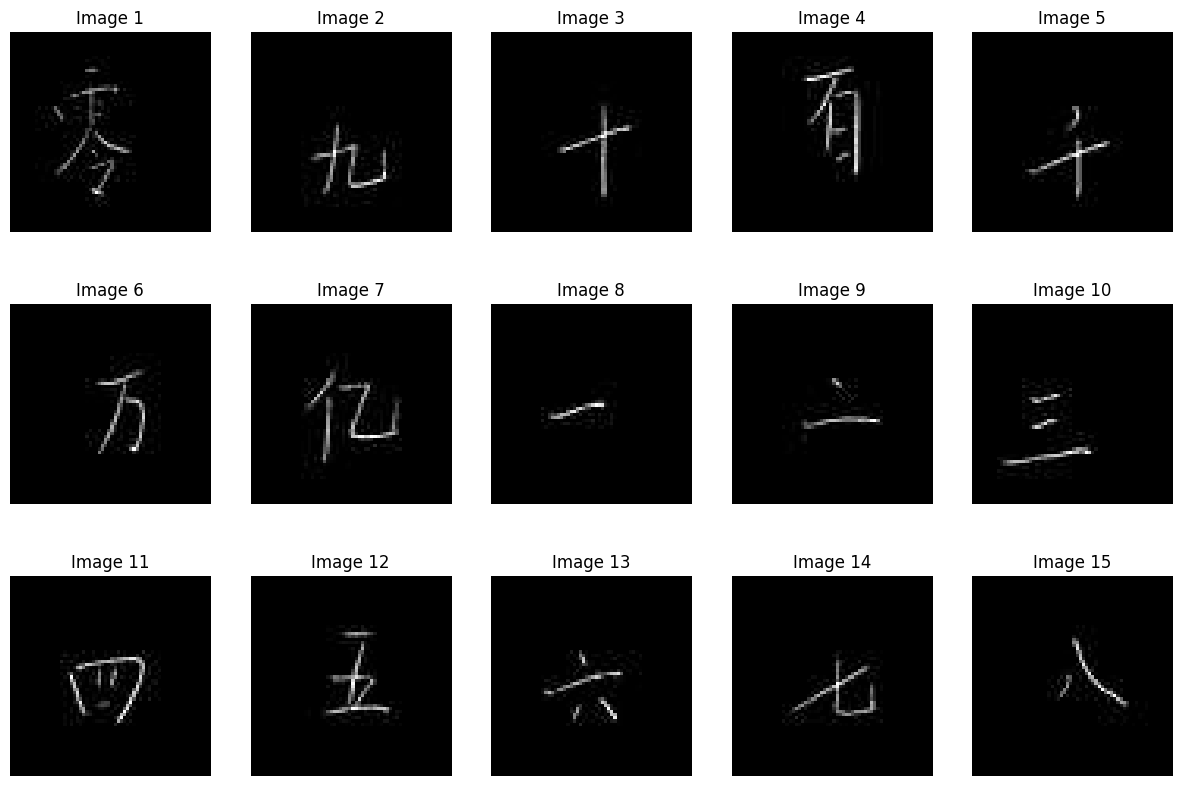

In [41]:
import matplotlib.image as mpimg
images_dir = '../data/raw/images' 
image_files = os.listdir(images_dir)
image_files.sort()

first_15_images = image_files[:15]
plt.figure(figsize=(15,10))
for i, filename in enumerate(first_15_images, 1):
    path = os.path.join(images_dir, filename)
    img = mpimg.imread(path)
    plt.subplot(3,5,i)
    plt.imshow(img, cmap='gray')
    plt.title(f"Image {i}")
    plt.axis('off')
plt.show()
    


We have to add class labels to the data that exists in order to make predictions a lot easier

In [42]:
val_to_class_mapping = {
    0:0, 
    1:1, 
    2:2, 
    3:3,
    4:4,
    5:5, 
    6:6, 
    7:7,
    8:8,
    9:9,
    10:10,
    100: 11,
    1000: 12,
    10000: 13,
    100000000: 14
}

data['class'] = data['value'].map(val_to_class_mapping)
data.head()

,suite_id,sample_id,code,value,character,class
0,1,1,10,9,九,9
1,1,10,10,9,九,9
2,1,2,10,9,九,9
3,1,3,10,9,九,9
4,1,4,10,9,九,9


Also should add filenames for simplicity and height and width

In [43]:
data['img_name'] = data.apply(lambda row: f'input_{row["suite_id"]}_{row["sample_id"]}_{row["code"]}', axis = 1)
data.head()

,suite_id,sample_id,code,value,character,class,img_name
0,1,1,10,9,九,9,input_1_1_10
1,1,10,10,9,九,9,input_1_10_10
2,1,2,10,9,九,9,input_1_2_10
3,1,3,10,9,九,9,input_1_3_10
4,1,4,10,9,九,9,input_1_4_10


In [44]:
data['width'] = 64 
data['height'] = 64
data.head()

,suite_id,sample_id,code,value,character,class,img_name,width,height
0,1,1,10,9,九,9,input_1_1_10,64,64
1,1,10,10,9,九,9,input_1_10_10,64,64
2,1,2,10,9,九,9,input_1_2_10,64,64
3,1,3,10,9,九,9,input_1_3_10,64,64
4,1,4,10,9,九,9,input_1_4_10,64,64


In [45]:
export_path = '../data/raw/chinese_mnist_classes.csv'
data.to_csv(export_path, index = False)